# Breast cancer

# problem statement

The goal of this project is to develop a machine learning model to classify breast cancer tumors as either malignant or benign based on various features extracted from data The dataset contains features such as texture, smoothness, symmetry, and other characteristics.

# Summary

This breast cancer machine learning project utilizes a dataset comprising 569 rows and 32 columns. The dataset is devoid of any null values.

Exploratory Data Analysis (EDA):

The analysis reveals a predominance of benign cases over malignant cases. Density graphs were plotted to visualize the distribution.

Feature Engineering:

To address multicollinearity issues, highly correlated features were removed, resulting in 24 remaining columns. Additionally, outlier detection was performed, revealing the presence of outliers in most columns.

Data Preprocessing:

The dataset was split into training and testing sets. Data scaling was applied to ensure uniformity across features.

Model Building and Evaluation:

Several classification models including Logistic Regression, K-Nearest Neighbors (KNN), Decision Trees, Random Forest, and Support Vector Machine (SVM) were trained and tested. The SVM model achieved the highest accuracy of 96.4%.

This project provides a comprehensive approach to breast cancer classification, offering valuable insights and predictive accuracy

# Ten real-valued features are computed for each cell nucleus:

# Import library

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# DATA GATHREING

In [2]:
df=pd.read_csv(r"C:\Users\GHANWAT\OneDrive\Desktop\cancer data.csv")
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


Data procecing

In [3]:
df.diagnosis.unique()

array(['M', 'B'], dtype=object)

M=Malignint
B=Benign

It is supervaise machine learning problem

In [4]:
df["diagnosis"].value_counts().to_dict()

{'B': 357, 'M': 212}

In [5]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [7]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


### Missing Value

In [8]:
df.isna().sum() 

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

There is no missing value in the data set 

# EDA

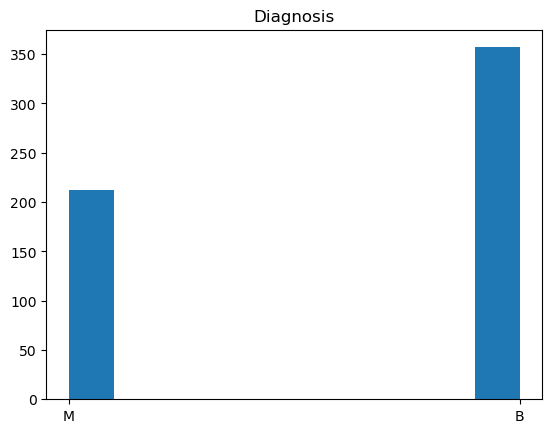

In [9]:
plt.hist(df["diagnosis"])
plt.title("Diagnosis")
plt.show()

In our data ther is lower no of Malignint and large number of Benign

# radius_mean

<Axes: xlabel='radius_mean', ylabel='Count'>

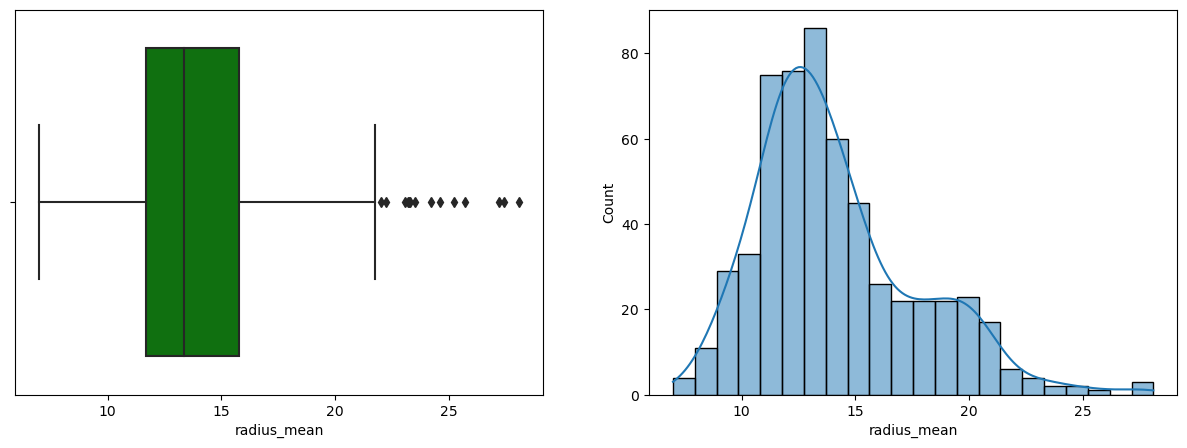

In [10]:
ax=plt.subplots(1,2,figsize=(15,5))
ax1=plt.subplot(1,2,1)
sns.boxplot(data=df,x="radius_mean",color='g')
ax2=plt.subplot(1,2,2)
sns.histplot(data=df,x="radius_mean",kde=True)

radius mean calumn have outliers and it is positively skewed.

In [11]:
df["diagnosis"].replace({'B':0 , 'M': 1},inplace=True)

# Density graph

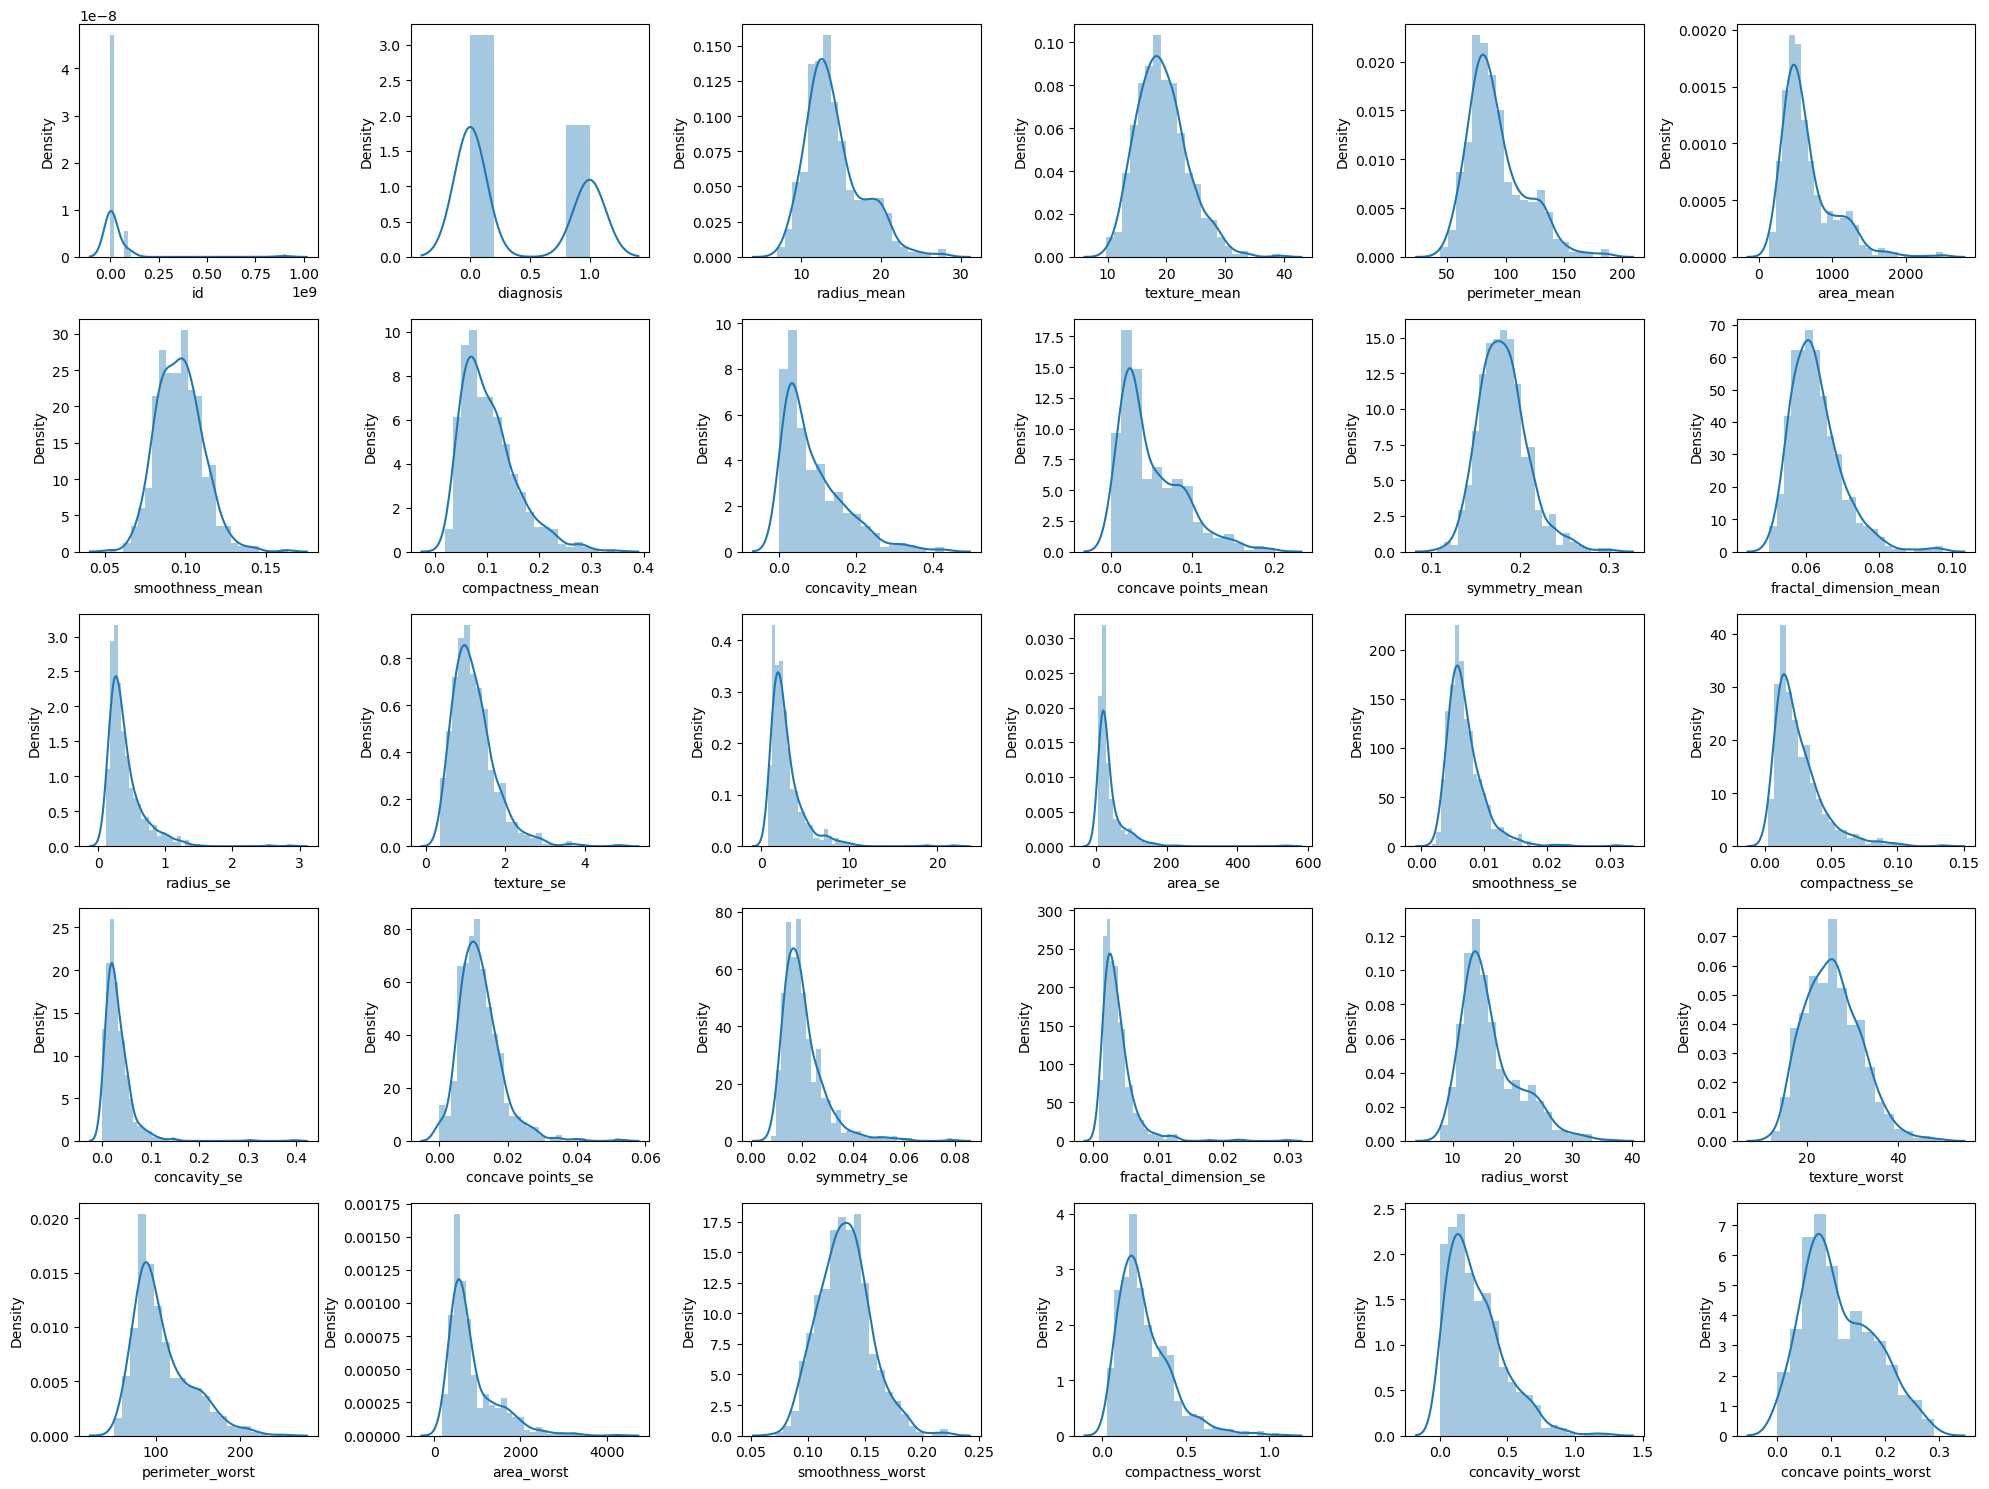

In [12]:

plt.figure(figsize = (20, 15))
plotnumber = 1

for column in df:
    if plotnumber <= 30:
        ax = plt.subplot(5, 6, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

In [13]:
df.corr()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,1.000000,0.039769,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,...,0.082405,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866
diagnosis,0.039769,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.074626,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.099770,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.073159,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.096893,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,-0.012968,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.000096,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.050080,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.044158,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661


Heatmap

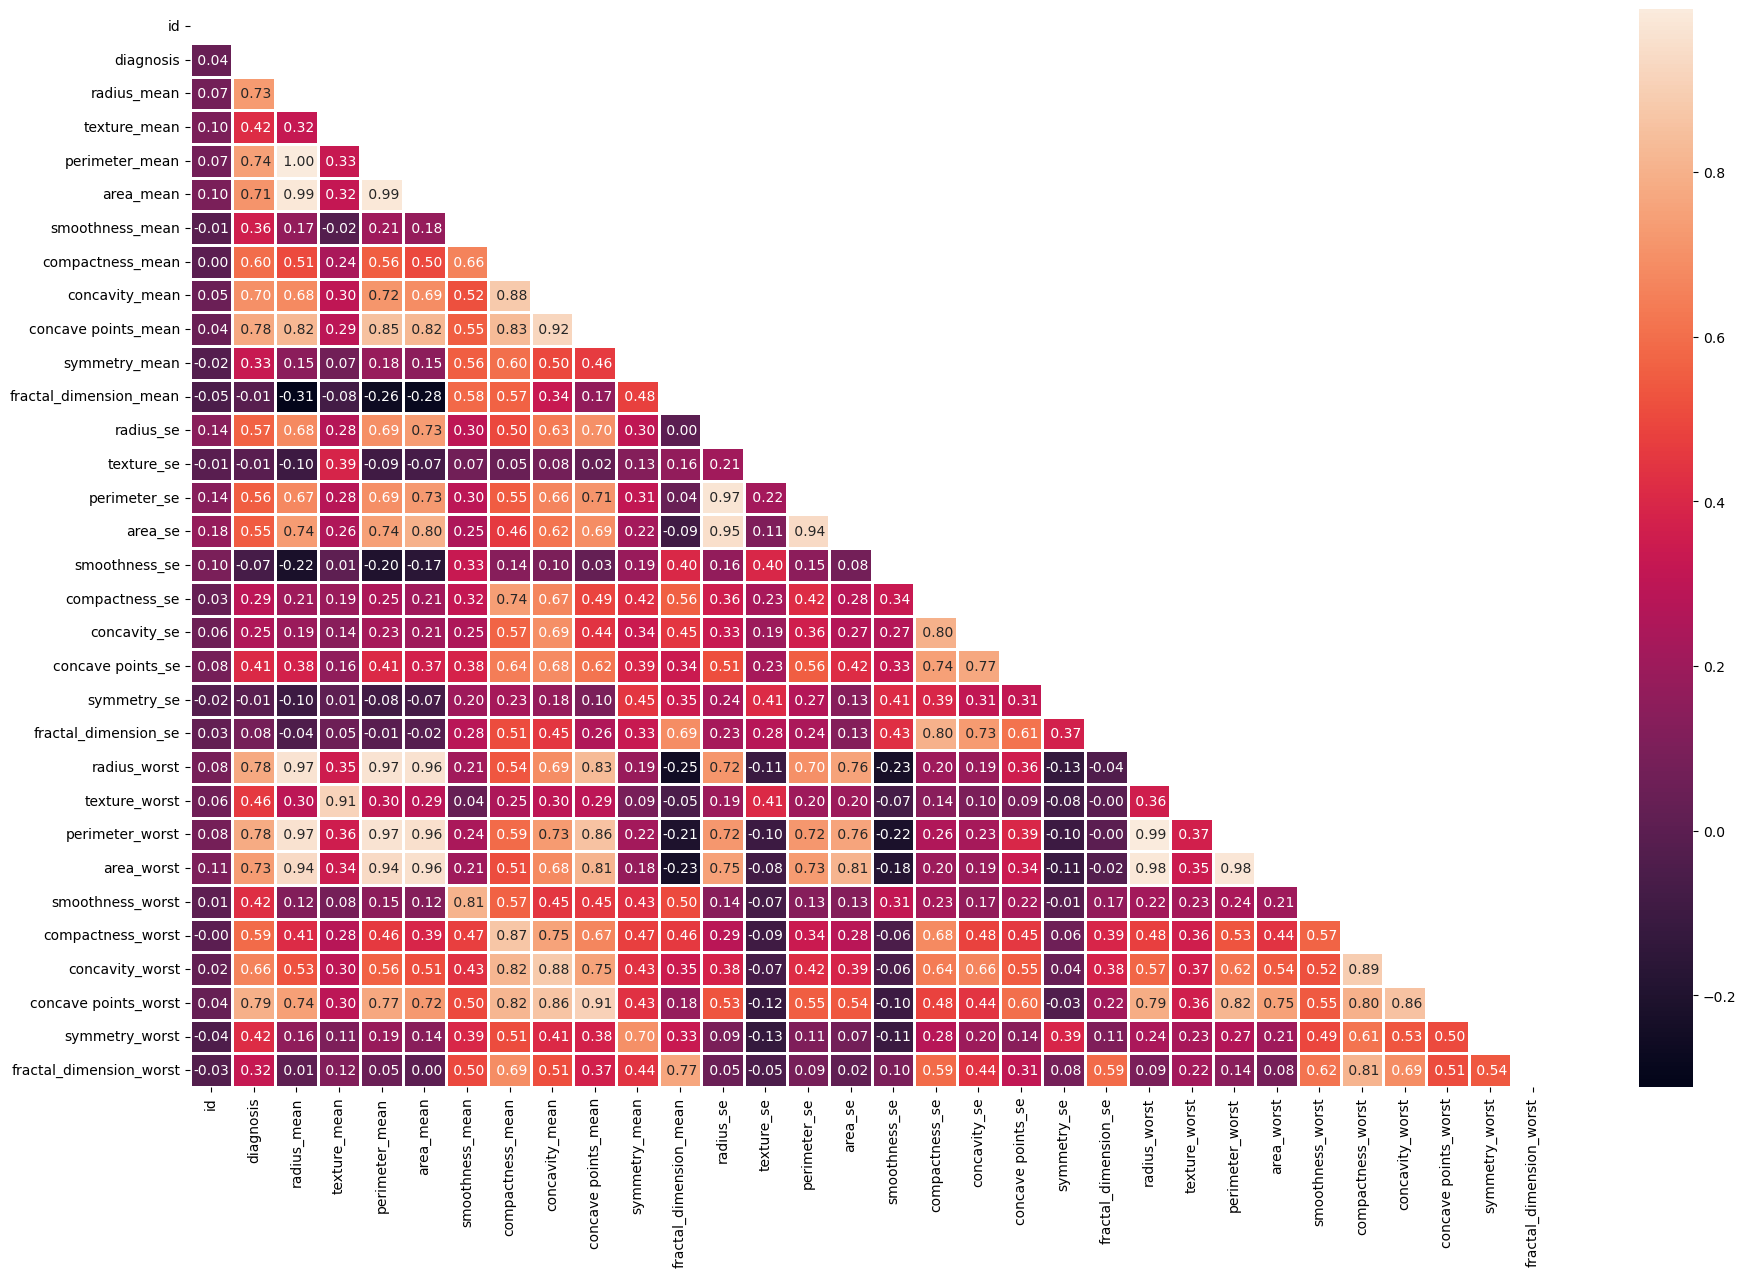

In [14]:
plt.figure(figsize=(22,14))
corr=df.corr()
mask=np.triu(np.ones_like(corr,dtype=bool))
sns.heatmap(df.corr(),annot=True,mask=mask,linewidths=1,fmt=" .2f")
plt.show()

Remove highly correlated feature
because of We can see that there are many columns which are very highly correlated which causes multicollinearity 

In [15]:
corr_matrix=df.corr().abs()
mask=np.triu(np.ones_like(corr_matrix,dtype= bool))
tri_df= corr_matrix.mask(mask)
to_drop=[x for x in tri_df.columns if any(tri_df[x]>0.92)]
df=df.drop(to_drop,axis=1)
print(df.shape[1])

24


# Outliers Detection 

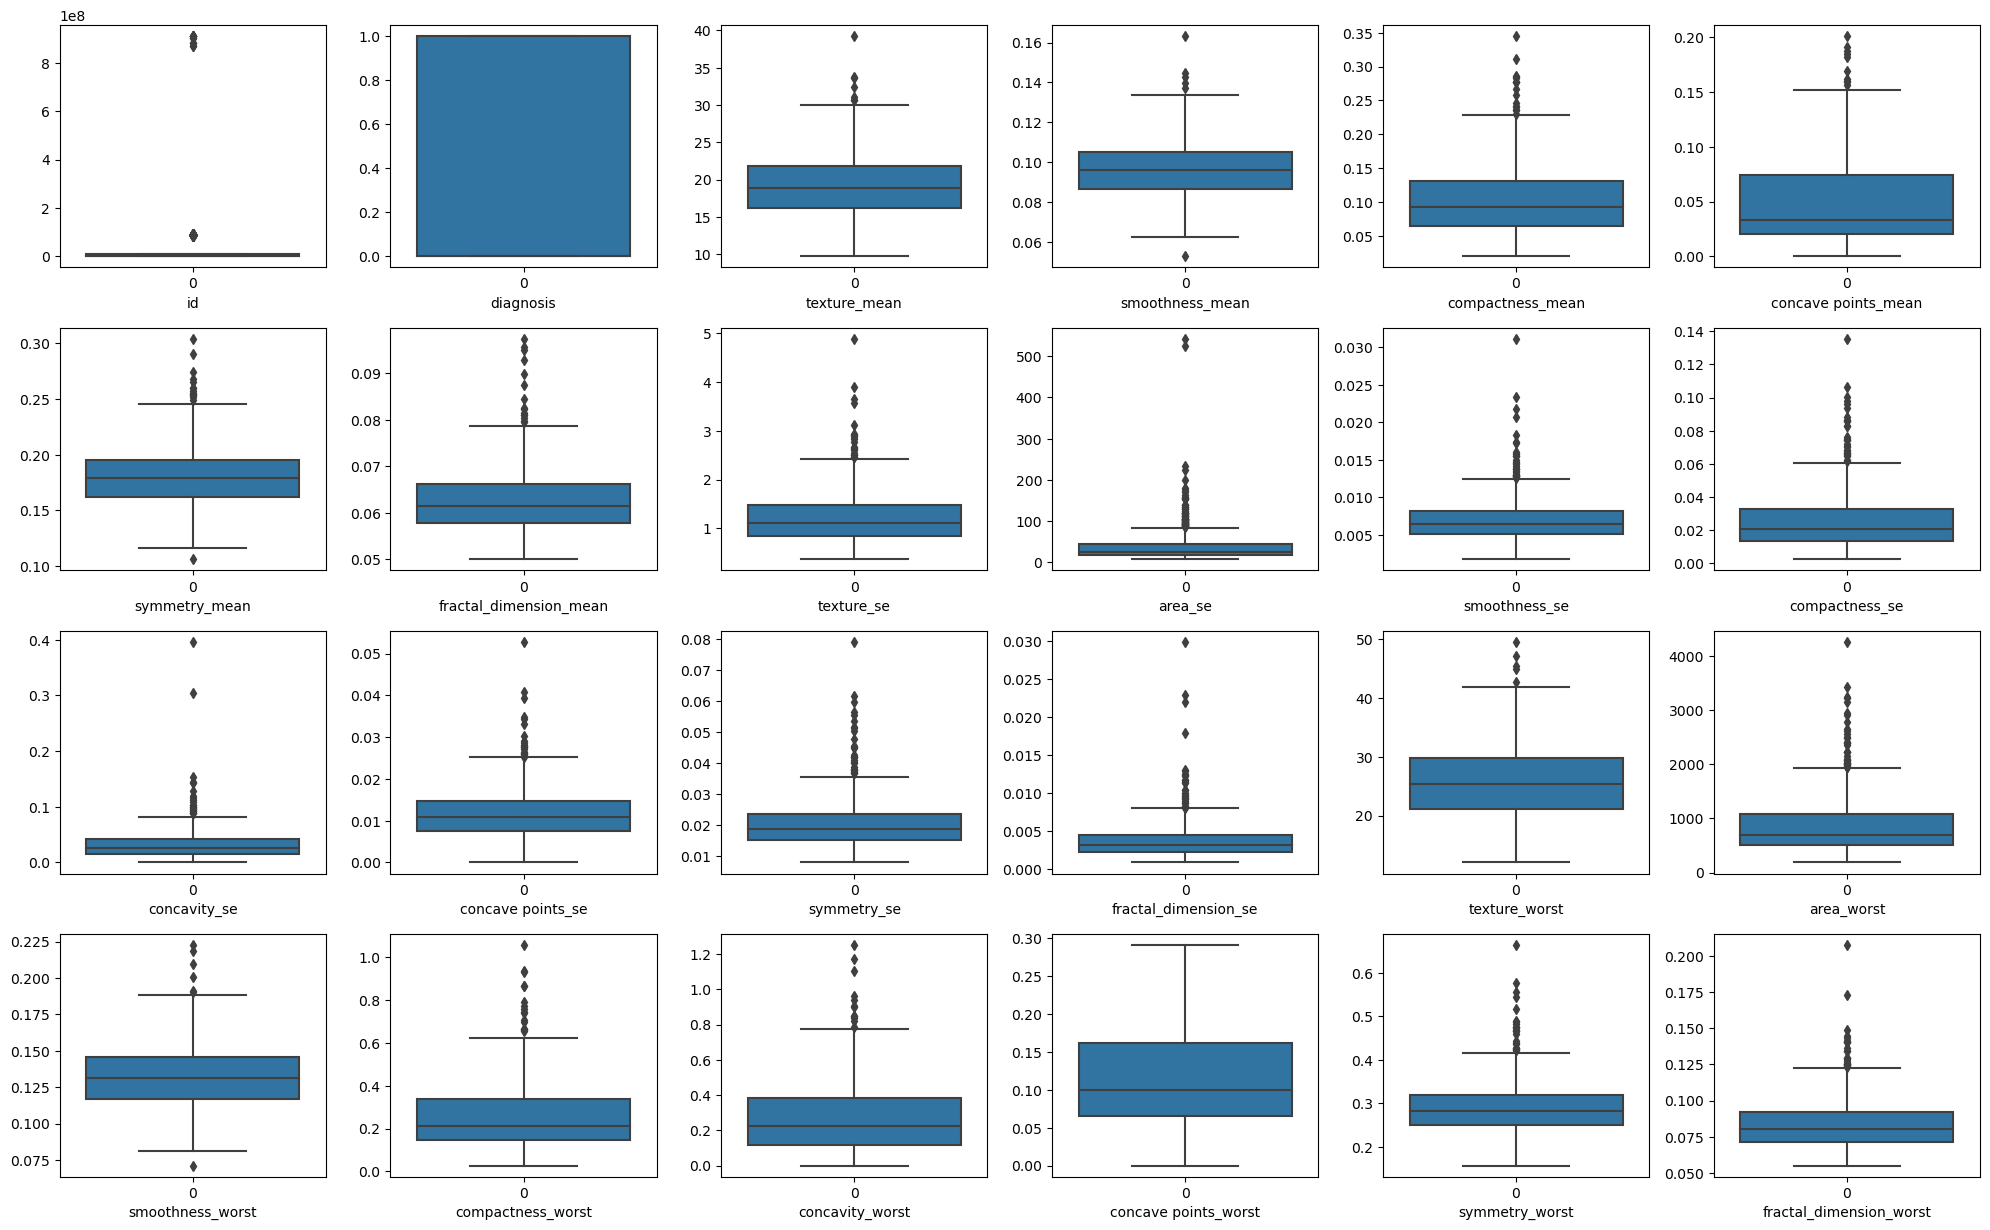

In [16]:
plt.figure(figsize = (20, 15))
plotnumber = 1

for column in df:
    if plotnumber <= 30:
        ax = plt.subplot(5, 6, plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

from above graph we clearly seen that each columns have outliers .


In [17]:
df.drop("id",axis=1,inplace=True)

In [18]:
df.shape

(569, 23)

In [19]:
df.head()

,diagnosis,texture_mean,smoothness_mean,compactness_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,...,symmetry_se,fractal_dimension_se,texture_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,10.38,0.11840,0.27760,0.14710,0.2419,0.07871,0.9053,153.40,0.006399,...,0.03003,0.006193,17.33,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,17.77,0.08474,0.07864,0.07017,0.1812,0.05667,0.7339,74.08,0.005225,...,0.01389,0.003532,23.41,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,21.25,0.10960,0.15990,0.12790,0.2069,0.05999,0.7869,94.03,0.006150,...,0.02250,0.004571,25.53,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,20.38,0.14250,0.28390,0.10520,0.2597,0.09744,1.1560,27.23,0.009110,...,0.05963,0.009208,26.50,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,14.34,0.10030,0.13280,0.10430,0.1809,0.05883,0.7813,94.44,0.011490,...,0.01756,0.005115,16.67,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# Train Test split

In [20]:
from sklearn.model_selection import train_test_split

split dependent variable(y) and independent variable(x)

In [21]:
x=df.drop("diagnosis",axis=1)

In [22]:
x.head()

,texture_mean,smoothness_mean,compactness_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,compactness_se,...,symmetry_se,fractal_dimension_se,texture_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,10.38,0.11840,0.27760,0.14710,0.2419,0.07871,0.9053,153.40,0.006399,0.04904,...,0.03003,0.006193,17.33,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,17.77,0.08474,0.07864,0.07017,0.1812,0.05667,0.7339,74.08,0.005225,0.01308,...,0.01389,0.003532,23.41,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,21.25,0.10960,0.15990,0.12790,0.2069,0.05999,0.7869,94.03,0.006150,0.04006,...,0.02250,0.004571,25.53,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,20.38,0.14250,0.28390,0.10520,0.2597,0.09744,1.1560,27.23,0.009110,0.07458,...,0.05963,0.009208,26.50,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,14.34,0.10030,0.13280,0.10430,0.1809,0.05883,0.7813,94.44,0.011490,0.02461,...,0.01756,0.005115,16.67,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [23]:
y=df["diagnosis"]

In [24]:
y

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

In [25]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.3,random_state=1)
x_train

,texture_mean,smoothness_mean,compactness_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,compactness_se,...,symmetry_se,fractal_dimension_se,texture_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
249,14.93,0.10130,0.07808,0.029290,0.1883,0.06168,1.0380,18.62,0.006662,0.012280,...,0.01677,0.002784,21.19,491.8,0.13890,0.15820,0.180400,0.09608,0.2664,0.07809
58,19.31,0.08060,0.03789,0.004167,0.1819,0.05501,1.2140,32.96,0.007491,0.008593,...,0.02190,0.002990,22.25,624.1,0.10210,0.06191,0.001845,0.01111,0.2439,0.06289
476,20.53,0.08931,0.11080,0.030580,0.1506,0.06009,1.0180,31.01,0.004107,0.032880,...,0.01610,0.002744,27.26,828.5,0.11530,0.34290,0.251200,0.13390,0.2534,0.07858
529,13.44,0.11000,0.09009,0.027980,0.1657,0.06608,0.5040,18.54,0.007327,0.011530,...,0.01962,0.002234,15.77,549.9,0.15210,0.16320,0.162200,0.07393,0.2781,0.08052
422,16.02,0.10880,0.11680,0.044970,0.1886,0.06320,0.7339,15.89,0.005884,0.020050,...,0.01848,0.001982,19.67,475.7,0.14150,0.21700,0.230200,0.11050,0.2787,0.07427
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,25.12,0.10150,0.15890,0.114900,0.2202,0.06113,1.1990,63.33,0.005033,0.031790,...,0.01578,0.003224,33.58,1589.0,0.12750,0.38610,0.567300,0.17320,0.3305,0.08465
144,14.97,0.07793,0.05139,0.007875,0.1399,0.05688,1.2390,17.74,0.006547,0.017810,...,0.01671,0.002360,20.72,441.2,0.10760,0.12230,0.097550,0.03413,0.2300,0.06769
72,24.52,0.10710,0.18300,0.079440,0.1927,0.06487,1.0410,69.47,0.005820,0.056160,...,0.01527,0.006299,33.82,1681.0,0.15850,0.73940,0.656600,0.18990,0.3313,0.13390
235,21.25,0.09070,0.06945,0.018960,0.1517,0.05835,1.5030,22.07,0.007389,0.013830,...,0.01263,0.002925,30.28,715.5,0.12870,0.15130,0.062310,0.07963,0.2226,0.07617


In [26]:
y_train

249    0
58     0
476    0
529    0
422    0
      ..
129    1
144    0
72     1
235    0
37     0
Name: diagnosis, Length: 398, dtype: int64

In [27]:
x_test

,texture_mean,smoothness_mean,compactness_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,compactness_se,...,symmetry_se,fractal_dimension_se,texture_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
421,13.98,0.10310,0.18360,0.06300,0.2086,0.07406,1.5110,49.45,0.009976,0.052440,...,0.02653,0.005444,18.34,809.2,0.1312,0.36350,0.32190,0.11080,0.2827,0.09208
47,18.66,0.11580,0.12310,0.07340,0.2128,0.06777,0.8937,24.25,0.006532,0.023360,...,0.01743,0.003643,27.95,759.4,0.1786,0.41660,0.50060,0.20880,0.3900,0.11790
292,16.02,0.10050,0.07943,0.03370,0.1730,0.06470,0.7636,17.67,0.008725,0.020030,...,0.02625,0.004726,19.93,585.4,0.1483,0.20680,0.22410,0.10560,0.3380,0.09584
186,18.58,0.08588,0.08468,0.05814,0.1621,0.05425,0.4757,28.92,0.002866,0.009181,...,0.01069,0.001087,26.36,1410.0,0.1234,0.24450,0.35380,0.15710,0.3206,0.06938
414,29.81,0.08320,0.04605,0.02739,0.1852,0.05294,1.6270,45.38,0.006831,0.014270,...,0.03151,0.001750,36.91,931.4,0.1148,0.09866,0.15470,0.06575,0.3233,0.06165
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6,19.98,0.09463,0.10900,0.07400,0.1794,0.05742,0.7732,53.91,0.004314,0.013820,...,0.01369,0.002179,27.66,1606.0,0.1442,0.25760,0.37840,0.19320,0.3063,0.08368
487,18.82,0.10890,0.14480,0.11940,0.1823,0.06115,1.4080,67.74,0.005288,0.028330,...,0.01717,0.003211,30.39,1740.0,0.1514,0.37250,0.59360,0.20600,0.3266,0.09009
11,17.89,0.09710,0.12920,0.06606,0.1842,0.06082,0.9849,54.16,0.005771,0.040610,...,0.02008,0.004144,27.28,1299.0,0.1396,0.56090,0.39650,0.18100,0.3792,0.10480
268,16.21,0.09425,0.06219,0.01615,0.2010,0.05769,1.2190,18.24,0.005518,0.021780,...,0.02593,0.002157,23.64,597.5,0.1256,0.18080,0.19920,0.05780,0.3604,0.07062


In [28]:
y_test

421    0
47     1
292    0
186    1
414    1
      ..
6      1
487    1
11     1
268    0
419    0
Name: diagnosis, Length: 171, dtype: int64

# Scaling data

In [29]:
from sklearn.preprocessing import StandardScaler

In [30]:
scaler=StandardScaler()

In [31]:
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

# Logistic Regression

In [32]:
from sklearn.linear_model import LogisticRegression

In [33]:
log_clf = LogisticRegression()
log_clf.fit(x_train,y_train)

LogisticRegression()

In [34]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

# Evalution train

In [35]:
y_pred_log = log_clf.predict(x_train)

cnf_matrix = confusion_matrix(y_train,y_pred_log)
print('confusion matrix :\n',cnf_matrix)

acc_score_LR_train = accuracy_score(y_train,y_pred_log)
print("Accuracy Score : ",acc_score_LR_train)

clf_report = classification_report(y_train , y_pred_log)
print('classification_report : \n',clf_report)



confusion matrix :
 [[249   0]
 [  4 145]]
Accuracy Score :  0.9899497487437185
classification_report : 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       249
           1       1.00      0.97      0.99       149

    accuracy                           0.99       398
   macro avg       0.99      0.99      0.99       398
weighted avg       0.99      0.99      0.99       398



# Evaluation¶ test

In [36]:

y_pred_log = log_clf.predict(x_test)

cnf_matrix = confusion_matrix(y_test,y_pred_log)
print('confusion matrix :\n',cnf_matrix)

acc_score_LR_test = accuracy_score(y_test,y_pred_log)
print("Accuracy Score : ",acc_score_LR_test)

clf_report = classification_report(y_test , y_pred_log)
print('classification_report : \n',clf_report)



confusion matrix :
 [[106   2]
 [  5  58]]
Accuracy Score :  0.9590643274853801
classification_report : 
               precision    recall  f1-score   support

           0       0.95      0.98      0.97       108
           1       0.97      0.92      0.94        63

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



# KNN

In [37]:
from sklearn.neighbors import KNeighborsClassifier

In [38]:
knn_model = KNeighborsClassifier()
knn_model.fit(x_train,y_train)


KNeighborsClassifier()

# Evalution  (train)

In [39]:
y_pred_knn = knn_model.predict(x_train)

cnf_matrix = confusion_matrix(y_train,y_pred_knn)
print('confusion matrix :\n',cnf_matrix)

acc_score_knn_train = accuracy_score(y_train,y_pred_knn)
print("Accuracy Score : ",acc_score_knn_train)

clf_report = classification_report(y_train , y_pred_knn)
print('classification_report : \n',clf_report)


confusion matrix :
 [[245   4]
 [  9 140]]
Accuracy Score :  0.9673366834170855
classification_report : 
               precision    recall  f1-score   support

           0       0.96      0.98      0.97       249
           1       0.97      0.94      0.96       149

    accuracy                           0.97       398
   macro avg       0.97      0.96      0.96       398
weighted avg       0.97      0.97      0.97       398



In [40]:

y_pred_knn = knn_model.predict(x_test)

cnf_matrix = confusion_matrix(y_test,y_pred_knn)
print('confusion matrix :\n',cnf_matrix)

acc_score_knn_test = accuracy_score(y_test,y_pred_knn)
print("Accuracy Score : ",acc_score_knn_test)

clf_report = classification_report(y_test , y_pred_knn)
print('classification_report : \n',clf_report)



confusion matrix :
 [[108   0]
 [  9  54]]
Accuracy Score :  0.9473684210526315
classification_report : 
               precision    recall  f1-score   support

           0       0.92      1.00      0.96       108
           1       1.00      0.86      0.92        63

    accuracy                           0.95       171
   macro avg       0.96      0.93      0.94       171
weighted avg       0.95      0.95      0.95       171



# Decision Tree

In [41]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [42]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

In [43]:
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train,y_train)

DecisionTreeClassifier()

In [44]:
## Training Data
y_pred_train = dt_model.predict(x_train)

Cnf_matrix = confusion_matrix(y_train,y_pred_train)
print('\nConfusion Matrix is :\n', Cnf_matrix)

acc_score_dt_train = accuracy_score(y_train,y_pred_train)
print('\nAccuracy Score :\n', acc_score_dt_train)

clf_report = classification_report(y_train,y_pred_train)
print('\nClassification Report:\n', clf_report)


Confusion Matrix is :
 [[249   0]
 [  0 149]]

Accuracy Score :
 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       249
           1       1.00      1.00      1.00       149

    accuracy                           1.00       398
   macro avg       1.00      1.00      1.00       398
weighted avg       1.00      1.00      1.00       398



In [45]:
## Testing Data
y_pred_test = dt_model.predict(x_test)

Cnf_matrix = confusion_matrix(y_test,y_pred_test)
print('\nConfusion Matrix is :\n', Cnf_matrix)

acc_score_dt_test = accuracy_score(y_test,y_pred_test)
print('\nAccuracy Score :\n', acc_score_dt_test)

clf_report = classification_report(y_test,y_pred_test)
print('\nClassification Report:\n', clf_report)


Confusion Matrix is :
 [[100   8]
 [  8  55]]

Accuracy Score :
 0.9064327485380117

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93       108
           1       0.87      0.87      0.87        63

    accuracy                           0.91       171
   macro avg       0.90      0.90      0.90       171
weighted avg       0.91      0.91      0.91       171



# Hyperparameter Tunning

In [46]:
dt_model = DecisionTreeClassifier()

hyp= {'criterion' : ['gini','entropy'],
'max_depth': np.arange(1,15),
'min_samples_leaf':np.arange(2,10), 
'min_samples_split':np.arange(2,20)}

gscv_dt_model = GridSearchCV(dt_model, hyp, cv=7)
gscv_dt_model.fit(x_train,y_train)

GridSearchCV(cv=7, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                         'min_samples_leaf': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19])})

In [ ]:
gscv_dt_model.best_estimator_

# Training Data after hyper parameter tunning

In [ ]:
## Training Data after hyper parameter tunning
dt_model= gscv_dt_model.best_estimator_
dt_model.fit(x_train,y_train)
y_pred_train = dt_model.predict(x_train)

Cnf_matrix = confusion_matrix(y_train,y_pred_train)
print('\nConfusion Matrix is :\n', Cnf_matrix)

acc_score_train_hyp_dt = accuracy_score(y_train,y_pred_train)
print('\nAccuracy Score :\n', acc_score_train_hyp_dt)

clf_report = classification_report(y_train,y_pred_train)
print('\nClassification Report:\n', clf_report)

In [ ]:
## Testing Data after hyper parameter tunning
dt_model= gscv_dt_model.best_estimator_
dt_model.fit(x_train,y_train)

y_pred_test = dt_model.predict(x_test)

Cnf_matrix = confusion_matrix(y_test,y_pred_test)
print('\nConfusion Matrix is :\n', Cnf_matrix)

acc_score_test_hyp_dt = accuracy_score(y_test,y_pred_test)
print('\nAccuracy Score :\n', acc_score_test_hyp_dt)

clf_report = classification_report(y_test,y_pred_test)
print('\nClassification Report:\n', clf_report)

# Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [ ]:
rf_model = RandomForestClassifier()
rf_model.fit(x_train,y_train)

# evalution train data

In [ ]:
y_pred_rf = rf_model.predict(x_train)

Cnf_matrix = confusion_matrix(y_train,y_pred_rf)
print('\nConfusion Matrix is :\n', Cnf_matrix)

acc_score_dt_train = accuracy_score(y_train,y_pred_rf)
print('\nAccuracy Score :\n', acc_score_dt_train)

clf_report = classification_report(y_train,y_pred_rf)
print('\nClassification Report:\n', clf_report)

# Evalution for test

In [ ]:
y_pred_rf = rf_model.predict(x_test)

Cnf_matrix = confusion_matrix(y_test,y_pred_rf)
print('\nConfusion Matrix is :\n', Cnf_matrix)

acc_score_test_hyp_dt = accuracy_score(y_test,y_pred_rf)
print('\nAccuracy Score :\n', acc_score_test_hyp_dt)

clf_report = classification_report(y_test,y_pred_rf)
print('\nClassification Report:\n', clf_report)

In [ ]:
rf_model = RandomForestClassifier()

hyp = {'criterion': ['gini','entropy'],
       'n_estimators': np.arange(10,200,10),
       'max_depth': np.arange(2,10),
       'min_samples_split': np.arange(2,20),
       'min_samples_leaf': np.arange(2,10)}

rscv_rf_clf = RandomizedSearchCV(rf_model, hyp, cv=7)
rscv_rf_clf.fit(x_train,y_train)

In [ ]:
rscv_rf_clf.best_estimator_

In [ ]:
rf_model = RandomForestClassifier(max_depth=8, 
                                  min_samples_leaf=2,
                                  min_samples_split=8, 
                                  n_estimators=80,
                                  max_features='sqrt',
                                  oob_score = True) # log2(no. of features)
rf_model.fit(x_train,y_train)

In [ ]:
# Train data Accuracy
y_pred_train = rf_model.predict(x_train)
cnf_matrix = confusion_matrix(y_train,y_pred_train)
print('\nConfusion MAtrix: ')
print(cnf_matrix)

acc_score_train_rf = accuracy_score(y_train,y_pred_train)
print('\nAccuracy score is', acc_score_train_rf)

clf_report = classification_report(y_train,y_pred_train)
print('\nClassification Report:\n', clf_report)

In [ ]:
# Test data Accuracy
y_pred = rf_model.predict(x_test)

cnf_matrix = confusion_matrix(y_test,y_pred)
print('\nConfusion MAtrix:\n ',cnf_matrix)

acc_score_test_rf = accuracy_score(y_test,y_pred)
print('\nAccuracy score is\n', acc_score_test_rf)

clf_report = classification_report(y_test,y_pred)
print('\nClassification Report:\n', clf_report)

In [ ]:
rf_model.oob_score_

# SVM

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.svm import SVC


In [ ]:
svc_model = SVC()
svc_model.fit(x_train, y_train)

In [ ]:
y_pred_train = svc_model.predict(x_train)

acc_score_train_svm= accuracy_score(y_train,y_pred_train)
print('Accuracy is:', acc_score_train_svm)

cnf_matrix = confusion_matrix(y_train,y_pred_train)
print('Confusion Matrix', cnf_matrix)

Clf = classification_report(y_train,y_pred_train)
print('Classification Report', Clf)

In [ ]:
y_pred_test = svc_model.predict(x_test)

acc_score_test_svm= accuracy_score(y_test,y_pred_test)
print('Accuracy is:', acc_score_test_svm)

cnf_matrix = confusion_matrix(y_test,y_pred_test)
print('Confusion Matrix', cnf_matrix)

Clf = classification_report(y_test,y_pred_test)
print('Classification Report', Clf)

# ## Hyperparameter Tuning

In [ ]:
svm_clf =SVC()
hyp = {'C': np.arange(0,10,0.1),
      'kernel':['linear','poly','rbf','sigmoid'],
      'gamma': np.arange(0,10,0.1)}

rscv_svm = RandomizedSearchCV(svm_clf, hyp, cv=3)
rscv_svm.fit(x_train, y_train)
rscv_svm.best_params_

In [ ]:
rscv_svm.best_estimator_

In [ ]:
svm_model = rscv_svm.best_estimator_
svm_model.fit(x_train, y_train)

# ## GridSearchCV

In [ ]:
svm_clf =SVC()
hyp = {'C': np.arange(0,5,0.25),
      'kernel':['linear','poly','rbf','sigmoid'],
      'gamma': np.arange(0,5,0.25)}

gscv_svm = GridSearchCV(svm_clf, hyp, cv=3)
gscv_svm.fit(x_train, y_train)
gscv_svm.best_params_

In [ ]:
gscv_svm.best_estimator_

In [ ]:
svm_model = gscv_svm.best_estimator_
svm_model.fit(x_train, y_train)

In [ ]:
# Train data Accuracy
y_pred_train = svm_model.predict(x_train)
cnf_matrix = confusion_matrix(y_train,y_pred_train)
print('\nConfusion MAtrix: ')
print(cnf_matrix)

acc_score_train_svm_hy = accuracy_score(y_train,y_pred_train)
print('\nAccuracy score is', acc_score_train_svm_hy)

clf_report = classification_report(y_train,y_pred_train)
print('\nClassification Report:\n', clf_report)

In [ ]:
# test data Accuracy
y_pred_test = svm_model.predict(x_test)
cnf_matrix = confusion_matrix(y_test,y_pred_test)
print('\nConfusion MAtrix: ')
print(cnf_matrix)

acc_score_test_svm_hy = accuracy_score(y_test,y_pred_test)
print('\nAccuracy score is', acc_score_test_svm_hy)

clf_report = classification_report(y_test,y_pred_test)
print('\nClassification Report:\n', clf_report)

In [ ]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN',  'Decision Tree Classifier', 'Random Forest Classifier',"SVM"],
    'Score': [acc_score_LR_test,acc_score_knn_test,acc_score_test_hyp_dt,acc_score_test_rf,acc_score_test_svm_hy]
})

models.sort_values(by = 'Score', ascending = False)

Best model for diagnosing breast cancer is "SVM Classifier" with an accuracy of 96.4%.